In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


#https://towardsdatascience.com/predicting-stock-prices-using-a-keras-lstm-model-4225457f0233

In [146]:
dataset= pd.read_csv('../Historical/HISTORICAL_CCL.csv')
training_set = dataset.iloc[:len(dataset)-100, 4:5].values

In [147]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [148]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [149]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [150]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
62/62 [==============================] - 8s 47ms/step - loss: 0.0821
Epoch 2/100
62/62 [==============================] - 3s 47ms/step - loss: 0.0056
Epoch 3/100
62/62 [==============================] - 3s 47ms/step - loss: 0.0050
Epoch 4/100
62/62 [==============================] - 3s 47ms/step - loss: 0.0051
Epoch 5/100
62/62 [==============================] - 3s 47ms/step - loss: 0.0045
Epoch 6/100
62/62 [==============================] - 3s 47ms/step - loss: 0.0043
Epoch 7/100
62/62 [==============================] - 3s 47ms/step - loss: 0.0039
Epoch 8/100
62/62 [==============================] - 3s 47ms/step - loss: 0.0035
Epoch 9/100
62/62 [==============================] - 3s 47ms/step - loss: 0.0036
Epoch 10/100
62/62 [==============================] - 3s 47ms/step - loss: 0.0035
Epoch 11/100
62/62 [==============================] - 3s 47ms/step - loss: 0.0037
Epoch 12/100
62/62 [==============================] - 3s 48ms/step - loss: 0.0041
Epoch 13/100
62/62 [=====

In [151]:
real_stock_price=dataset.iloc[len(dataset)-100:, 4:5].values

In [152]:
dataset_total =dataset['Close']
inputs = dataset_total[len(dataset_total) - 100 - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 100+60-1):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

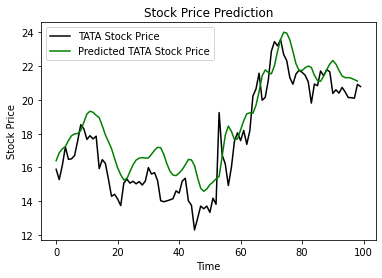

In [153]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
error=0
l = len(data)
serie=[]

prueba=pd.DataFrame (list(data[l-360:l-1]), columns =["Real"])
for i in range(360, 1, -1):
    #print(i)
    forecasting_result=AR(data[:l-i])
    x=float(forecasting_result)
    #x=forecasting_result[0]
    serie.append(x)
    error+=((x-data[l-i])/data[l-i])**2


prueba['Pronostico']=serie
prueba['Diferencia']=prueba['Pronostico']-prueba['Real']
prueba['Abs_Error']=abs(prueba['Diferencia']/prueba['Real'])
prueba['Error']=prueba['Diferencia']/prueba['Real']
prueba


stocks_buy=0
investment=10000
investment_flow=[10000]
for i in range(0,358):
    if prueba['Real'][i] < prueba['Pronostico'][i] :
        if investment > 0:
            investment = (investment/prueba['Real'][i])*prueba['Real'][i+1]
    else:
        if stocks_buy > 0:
            investment = stocks_buy*prueba['Real'][i]
            stock_buy = 0
    investment_flow.append(investment)
prueba['Investment_Flow']= investment_flow        
prueba.to_csv('example.csv')
print('Metodologia')
print(investment)
print('Value Investing')
print(prueba['Investment_Flow'][0]*prueba['Real'][358]/prueba['Real'][0])